# COURSE: A deep understanding of deep learning
## SECTION: Weight inits and investigations
### LECTURE: Xavier and Kaiming initializations
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [85]:
# import libraries
import numpy as np
import torch
import torch.nn as nn


import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-85-91b9b1e6b027>:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Create the DL model

In [102]:
# create a class for the model
class thenet(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(100,1931039)

    ### hidden layer
    self.fc1 = nn.Linear(1931039,32)
    self.fc2 = nn.Linear(32,11)
    self.fc3 = nn.Linear(11,100)

    ### output layer
    self.output = nn.Linear(100,2)

  # forward pass
  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) )
    x = F.relu( self.fc2(x) )
    x = F.relu( self.fc3(x) )
    return self.output(x)

# Explore the initialized weights

In [103]:
# create an instance of the model
net = thenet()
print(net)

thenet(
  (input): Linear(in_features=100, out_features=1931039, bias=True)
  (fc1): Linear(in_features=1931039, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=11, bias=True)
  (fc3): Linear(in_features=11, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=2, bias=True)
)


There are 1931184 bias parameters.
There are 254898800 weight parameters.


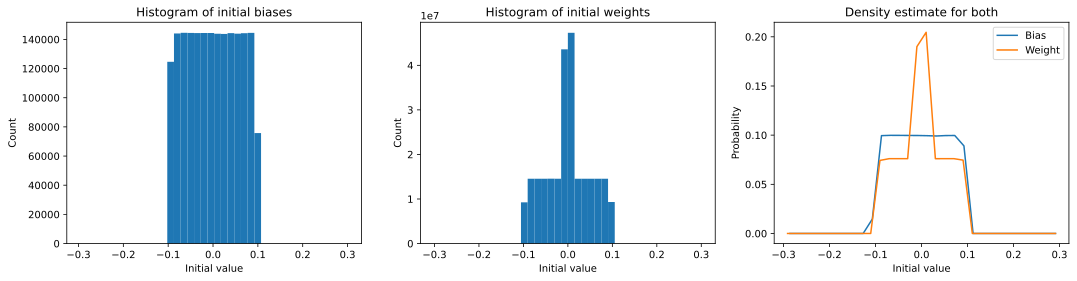

In [104]:
# collect all weights and biases
allweight = np.array([])
allbiases = np.array([])

for p in net.named_parameters():
  if 'bias' in p[0]:
    allbiases = np.concatenate( (allbiases,p[1].data.numpy().flatten()),axis=0 )
  elif 'weight' in p[0]:
    allweight = np.concatenate( (allweight,p[1].data.numpy().flatten()),axis=0 )


# how many are there?
print(f'There are {len(allbiases)} bias parameters.')
print(f'There are {len(allweight)} weight parameters.')


# show their histograms
fig,ax = plt.subplots(1,3,figsize=(18,4))

ax[0].hist(allbiases,40)
ax[0].set_title('Histogram of initial biases')


ax[1].hist(allweight,40)
ax[1].set_title('Histogram of initial weights')



# collect histogram data to show as line plots
yB,xB = np.histogram(allbiases,30)
yW,xW = np.histogram(allweight,30)

ax[2].plot((xB[1:]+xB[:-1])/2,yB/np.sum(yB),label='Bias')
ax[2].plot((xW[1:]+xW[:-1])/2,yW/np.sum(yW),label='Weight')
ax[2].set_title('Density estimate for both')
ax[2].legend()


# plot adjustments common to all subplots
for i in range(3):
  ax[i].set_xlabel('Initial value')
  ax[i].set_ylabel('Count')
ax[2].set_ylabel('Probability')

plt.show()

# Layer-specific distributions

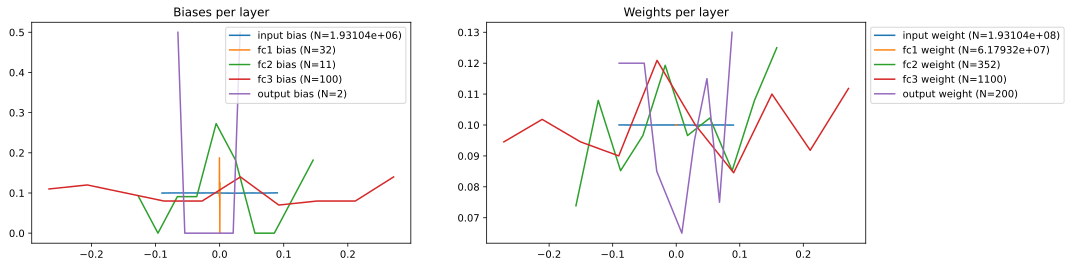

In [105]:

fig,ax = plt.subplots(1,2,figsize=(15,4))

for p in net.named_parameters():

  # get the data and compute their histogram
  thesedata = p[1].data.numpy().flatten()
  y,x = np.histogram(thesedata,10)

  # for the bias
  if 'bias' in p[0]:
    ax[0].plot((x[1:]+x[:-1])/2,y/np.sum(y),label='%s bias (N=%g)'%(p[0][:-5],len(thesedata)))

  # for the weights
  elif 'weight' in p[0]:
    ax[1].plot((x[1:]+x[:-1])/2,y/np.sum(y),label='%s weight (N=%g)'%(p[0][:-7],len(thesedata)))



ax[0].set_title('Biases per layer')
ax[0].legend()
ax[1].set_title('Weights per layer')
ax[1].legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

In [106]:
ad = []
arayc = np.array([])
for p in net.named_parameters():
  if p[0] == 'output.weight' :
    arayc = np.concatenate((arayc , p[1].data.numpy().flatten()))
  ad.append(i)
  ad.append('----------------------------------------------------------------------------------')


In [107]:
arayc

array([-0.01217544,  0.05907816, -0.08631384,  0.02488599, -0.05773932,
       -0.08005308,  0.08201507, -0.00195251, -0.09972896, -0.05202116,
        0.00974747, -0.05893172, -0.0102704 , -0.09656987, -0.08685267,
        0.0826323 ,  0.0700187 ,  0.07781787, -0.07966597,  0.05390888,
       -0.06599992, -0.01581639,  0.08339303, -0.01285224, -0.01464305,
        0.09167878, -0.06900084,  0.04878854, -0.0968303 , -0.02938374,
        0.02601194,  0.01833855,  0.052136  , -0.0821251 , -0.06004729,
        0.05201823, -0.03540134, -0.02249522,  0.00351968, -0.0588814 ,
        0.04020994, -0.05558515, -0.04505804, -0.03286367, -0.07578661,
       -0.0322861 , -0.06103729,  0.03815067, -0.06066196, -0.09537333,
        0.01714232,  0.06295925,  0.03133292, -0.01781993, -0.07191432,
        0.0625136 , -0.0602564 ,  0.05685135, -0.03079318,  0.08374441,
       -0.07308724,  0.07306188, -0.04301292, -0.05931465,  0.07877032,
       -0.00425217, -0.09818412,  0.06172154,  0.07720482,  0.03

In [108]:
# What's up with the weird output bias distribution??
print( net.output.bias.data )

tensor([-0.0705,  0.0373])


In [109]:
# Check out the docstring for linear layers
nn.Linear?

In [110]:
# Let's test whether the numbers match our prediction from the formula

# empirical bias range
biasrange = [ torch.min(net.fc1.bias.data).item(), torch.max(net.fc1.bias.data).item() ]
biascount = len(net.fc1.bias.data)

# theoretical expected value
sigma = np.sqrt(1/biascount)

# drum rolllllll.....
print('Theoretical sigma = ' + str(sigma))
print('Empirical range = ' + str(biasrange))

Theoretical sigma = 0.1767766952966369
Empirical range = [-0.000626035442110151, 0.0006696185446344316]


# Now to initialize the weights using the Xavier method

In [111]:
# create a new instance of the model
net = thenet()

# change the weights (leave biases as Kaiming [default])
for p in net.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [112]:
# Note: it is unconventional to have Kaiming biases and Xavier weights.
# Scroll up and re-run the previous weights visualization cells with the new network.
# Then continue below.

In [113]:
# Let's test whether the numbers match our prediction from the formula

# empirical weight standard deviation
weightvar   = torch.var(net.fc1.weight.data.flatten()).item()
weightcount = len(net.fc1.weight.data)

# theoretical expected value
sigma2 = 2 / (weightcount+weightcount)

# drum rolllllll.....
print('Theoretical sigma = ' + str(sigma2))
print('Empirical variance = ' + str(weightvar))

Theoretical sigma = 0.03125
Empirical variance = 1.0355635140513186e-06


In [114]:
# Note: There are several other weights initialization methods availabe in PyTorch.
#       See https://pytorch.org/docs/stable/nn.init.html

# Additional explorations

In [115]:
# 1) Explore the weight initialization options using PyTorch's functions (nn.init.<method>).
#    For example: apply Xavier-uniform, Kaiming, constant (this is what we did in the first video of this section).
#